1. Setup and Model Loading

First, we import the necessary libraries and load our two distinct models. We load SmolLM2-135M as the "Generator" (the model we are testing) and a separate Reward Model as the "Judge" to evaluate the quality of the text. We also load a tiny subset of the Alpaca dataset to get instruction prompts.

In [1]:
%pip install datasets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set device to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# 1. Load the Generator (SmolLM2)
model_name = "HuggingFaceTB/SmolLM2-135M-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

# 2. Load the Judge (Reward Model)
# This assigns a score to the output. Higher is better.
# We use a try/except block to fallback to a lighter model if you run out of RAM.
rm_name = "OpenAssistant/reward-model-deberta-v3-large-v2"
try:
    reward_pipe = pipeline("text-classification", model=rm_name, device=0 if device=="cuda" else -1, truncation=True)
except Exception as e:
    print(f"Warning: Large reward model failed. Loading lighter model...")
    reward_pipe = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english", device=0 if device=="cuda" else -1)

# 3. Load Data (Just 10 prompts for testing)
ds = load_dataset("tatsu-lab/alpaca", split="train[:10]")
prompts = [x['instruction'] for x in ds]

print("Setup Complete.")

Using device: cuda


tokenizer_config.json: 0.00B [00:00, ?B/s]

C:\Users\abdul\AppData\Roaming\Python\Python313\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\abdul\.cache\huggingface\hub\models--HuggingFaceTB--SmolLM2-135M-Instruct. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/861 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/269M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/993 [00:00<?, ?B/s]

C:\Users\abdul\AppData\Roaming\Python\Python313\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\abdul\.cache\huggingface\hub\models--OpenAssistant--reward-model-deberta-v3-large-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installe

pytorch_model.bin:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/455 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

Device set to use cuda:0


README.md: 0.00B [00:00, ?B/s]

C:\Users\abdul\AppData\Roaming\Python\Python313\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\abdul\.cache\huggingface\hub\datasets--tatsu-lab--alpaca. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular H

(…)-00000-of-00001-a09b74b3ef9c3b56.parquet:   0%|          | 0.00/24.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/52002 [00:00<?, ? examples/s]

Setup Complete.


2. Metric Helper Functions

We define two critical functions here. calculate_distinct_n measures diversity by counting the ratio of unique word sequences (N-grams) to total sequences. get_quality_score runs the generated text through our Reward Model to get a scalar value representing "goodness."

In [4]:
def calculate_distinct_n(text_list, n=2):
    """
    Calculates Distinct-N.
    Returns: Float ratio (0.0 to 1.0).
    """
    all_ngrams = []
    for text in text_list:
        tokens = text.lower().split()
        if len(tokens) >= n:
            ngrams = [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]
            all_ngrams.extend(ngrams)
    
    if not all_ngrams:
        return 0.0
    return len(set(all_ngrams)) / len(all_ngrams)

def get_quality_score(text):
    """
    Returns the scalar score from the reward model.
    """
    try:
        # Get top prediction score
        res = reward_pipe(text, top_k=1)
        return res[0]['score']
    except:
        return 0.0

3. The Universal Generation Function

This function encapsulates the logic for all four decoding strategies. It sets num_beams for Beam Search, top_k for Top-K sampling, and top_p for Nucleus sampling. It handles the model.generate() call and strips the prompt from the result so we only analyze new text.

In [5]:
def run_generation(prompt, strategy, temp=1.0):
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    
    # Base configuration
    gen_kwargs = {
        "max_new_tokens": 60,
        "pad_token_id": tokenizer.eos_token_id,
        "do_sample": False # Default to deterministic
    }
    
    # Strategy Logic
    if strategy == "greedy":
        gen_kwargs["do_sample"] = False
        gen_kwargs["num_beams"] = 1
        
    elif strategy == "beam":
        gen_kwargs["do_sample"] = False
        gen_kwargs["num_beams"] = 5 
        gen_kwargs["early_stopping"] = True
        
    elif strategy == "top_k":
        gen_kwargs["do_sample"] = True
        gen_kwargs["top_k"] = 50 
        gen_kwargs["temperature"] = temp
        
    elif strategy == "top_p":
        gen_kwargs["do_sample"] = True
        gen_kwargs["top_p"] = 0.9 
        gen_kwargs["temperature"] = temp
        
    with torch.no_grad():
        outputs = model.generate(**inputs, **gen_kwargs)
        
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_text.replace(prompt, "").strip()

4. Main Experiment Loop (Temperature Sweep)

This is the core data collection loop. We iterate through every prompt using every strategy. For the sampling methods (Top-K/Top-P), we also iterate through a range of temperatures to observe the quality-diversity trade-off. We save all results to a CSV file.

In [6]:
print("--- Starting Main Experiment (Temperature Sweep) ---")
strategies = ["greedy", "beam", "top_k", "top_p"]
temperatures = [0.2, 0.5, 0.8, 1.0, 1.2]
results_data = []

for i, prompt in enumerate(prompts):
    print(f"Processing Prompt {i+1}/{len(prompts)}...")
    
    for strat in strategies:
        # Only run temp sweep for sampling methods
        current_temps = temperatures if strat in ["top_k", "top_p"] else [1.0]
        
        for t in current_temps:
            # Generate
            out_text = run_generation(prompt, strat, temp=t)
            
            # Measure
            div_score = calculate_distinct_n([out_text], n=2) 
            qual_score = get_quality_score(out_text)
            
            results_data.append({
                "prompt_id": i,
                "strategy": strat,
                "temperature": t,
                "distinct_2": div_score,
                "quality_score": qual_score,
                "text": out_text
            })

# Save Sweep Results
df_sweep = pd.DataFrame(results_data)
df_sweep.to_csv("task1_sweep_results.csv", index=False)
print("Main Experiment Complete.")

--- Starting Main Experiment (Temperature Sweep) ---
Processing Prompt 1/10...


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Processing Prompt 2/10...
Processing Prompt 3/10...
Processing Prompt 4/10...
Processing Prompt 5/10...
Processing Prompt 6/10...
Processing Prompt 7/10...
Processing Prompt 8/10...
Processing Prompt 9/10...
Processing Prompt 10/10...
Main Experiment Complete.


5. Diversity Analysis (Within-Prompt vs Across-Prompt)

Here we perform the two specific diversity tests requested.

    Within-Prompt: We generate 10 different responses for the same prompt to see if the model repeats itself.

    Across-Prompt: We aggregate the responses for different prompts to see if the model uses a diverse vocabulary globally. We use a fixed temperature of 0.8 for fair comparison.

In [7]:
print("--- Starting Diversity Deep-Dive (T=0.8) ---")
diversity_results = []
fixed_temp = 0.8
target_prompt = prompts[0] # Use first prompt for "Within-Prompt" test

# A. Within-Prompt Test (10 samples, 1 prompt)
for strat in ["top_k", "top_p"]:
    outputs = []
    for _ in range(10): 
        outputs.append(run_generation(target_prompt, strat, temp=fixed_temp))
    
    # Calculate diversity of the SET of outputs
    score = calculate_distinct_n(outputs, n=2)
    diversity_results.append({"type": "Within-Prompt", "strategy": strat, "score": score})

# B. Across-Prompt Test (1 sample, 10 prompts)
for strat in strategies:
    if strat in ["greedy", "beam"]:
        subset = df_sweep[df_sweep['strategy'] == strat]['text'].tolist()
    else:
        subset = df_sweep[(df_sweep['strategy'] == strat) & (df_sweep['temperature'] == fixed_temp)]['text'].tolist()
    
    if subset:
        score = calculate_distinct_n(subset, n=2)
        diversity_results.append({"type": "Across-Prompt", "strategy": strat, "score": score})

# Save Diversity Results
df_div = pd.DataFrame(diversity_results)
df_div.to_csv("task1_diversity_metrics.csv", index=False)
print("Diversity Analysis Complete.")

--- Starting Diversity Deep-Dive (T=0.8) ---
Diversity Analysis Complete.


6. Visualization

Finally, we visualize the data. We aggregate the results by strategy and temperature and generate a scatter plot. This plot visualizes the "Trade-off": as temperature increases, diversity (X-axis) should go up, while quality (Y-axis) typically goes down.

--- Generating Plots ---
Plot saved as task1_tradeoff_plot.png


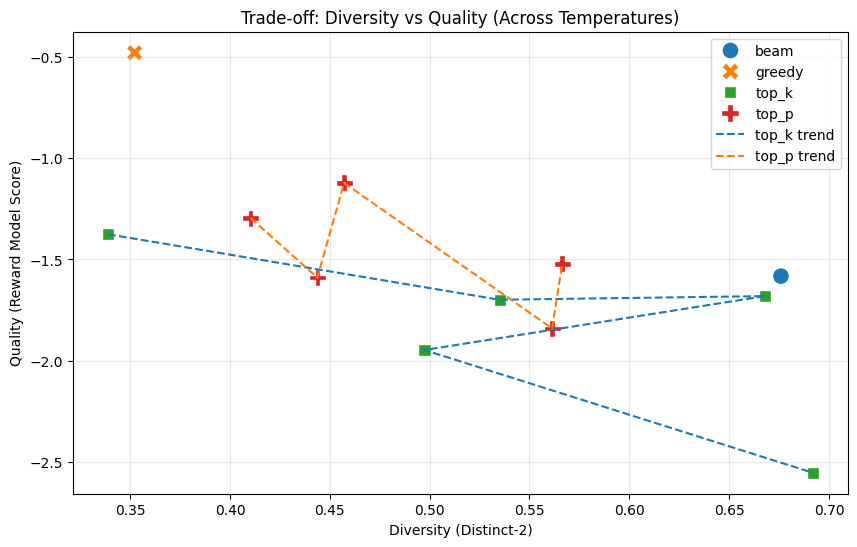

In [ ]:
print("--- Generating Plots ---")
# Aggregate mean scores for the plot
plot_data = df_sweep.groupby(['strategy', 'temperature'])[['distinct_2', 'quality_score']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x='distinct_2', y='quality_score', hue='strategy', style='strategy', s=150)

# Draw lines connecting the temperature points for Top-K/Top-P
for strat in ["top_k", "top_p"]:
    subset = plot_data[plot_data['strategy'] == strat].sort_values('temperature')
    plt.plot(subset['distinct_2'], subset['quality_score'], label=f'{strat} trend', linestyle='--')

plt.title("Trade-off: Diversity vs Quality (Across Temperatures)")
plt.xlabel("Diversity (Distinct-2)")
plt.ylabel("Quality (Reward Model Score)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig("task1_tradeoff_plot.png")
print("Plot saved as task1_tradeoff_plot.png") 